<a href="https://colab.research.google.com/github/PG-2597/BCG_AI-Financial-Chatbot/blob/main/Task_1_Data_Extraction_and_Initial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Step 1: Import Necessary Libraries :** Import the pandas library for data manipulation and matplotlib for data visualization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load Data from Excel File

In [5]:
excel_file_path = "Financial_Data.xlsx"
data = pd.read_excel(excel_file_path)

# Step 3: Save as CSV File for Easier Handling

In [6]:
csv_file_path = "Financial_Data.csv"
data.to_csv(csv_file_path, index=False)

# Step 4: Load the CSV File into a DataFrame

In [7]:
data = pd.read_csv(csv_file_path)

# Step 5: Calculate Year-over-Year Changes for Each Financial Metric

In [8]:
data['Revenue YoY Change'] = data.groupby('Company')['Total Revenue'].pct_change() * 100
data['Net Income YoY Change'] = data.groupby('Company')['Net Income'].pct_change() * 100
data['Assets YoY Change'] = data.groupby('Company')['Total Assets'].pct_change() * 100
data['Liabilities YoY Change'] = data.groupby('Company')['Total Liabilities'].pct_change() * 100
data['Cash Flow YoY Change'] = data.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

# Step 6: Function to Plot Trends

In [9]:
def plot_trend(ax, metric, title):
    for company in data['Company'].unique():
        company_data = data[data['Company'] == company]
        ax.plot(company_data['Fiscal Year'], company_data[metric], marker='o', label=company)
    ax.set_title(title)
    ax.set_xlabel('Fiscal Year')
    ax.set_ylabel(title)
    ax.legend()

# Step 7: Create a Figure for Subplots

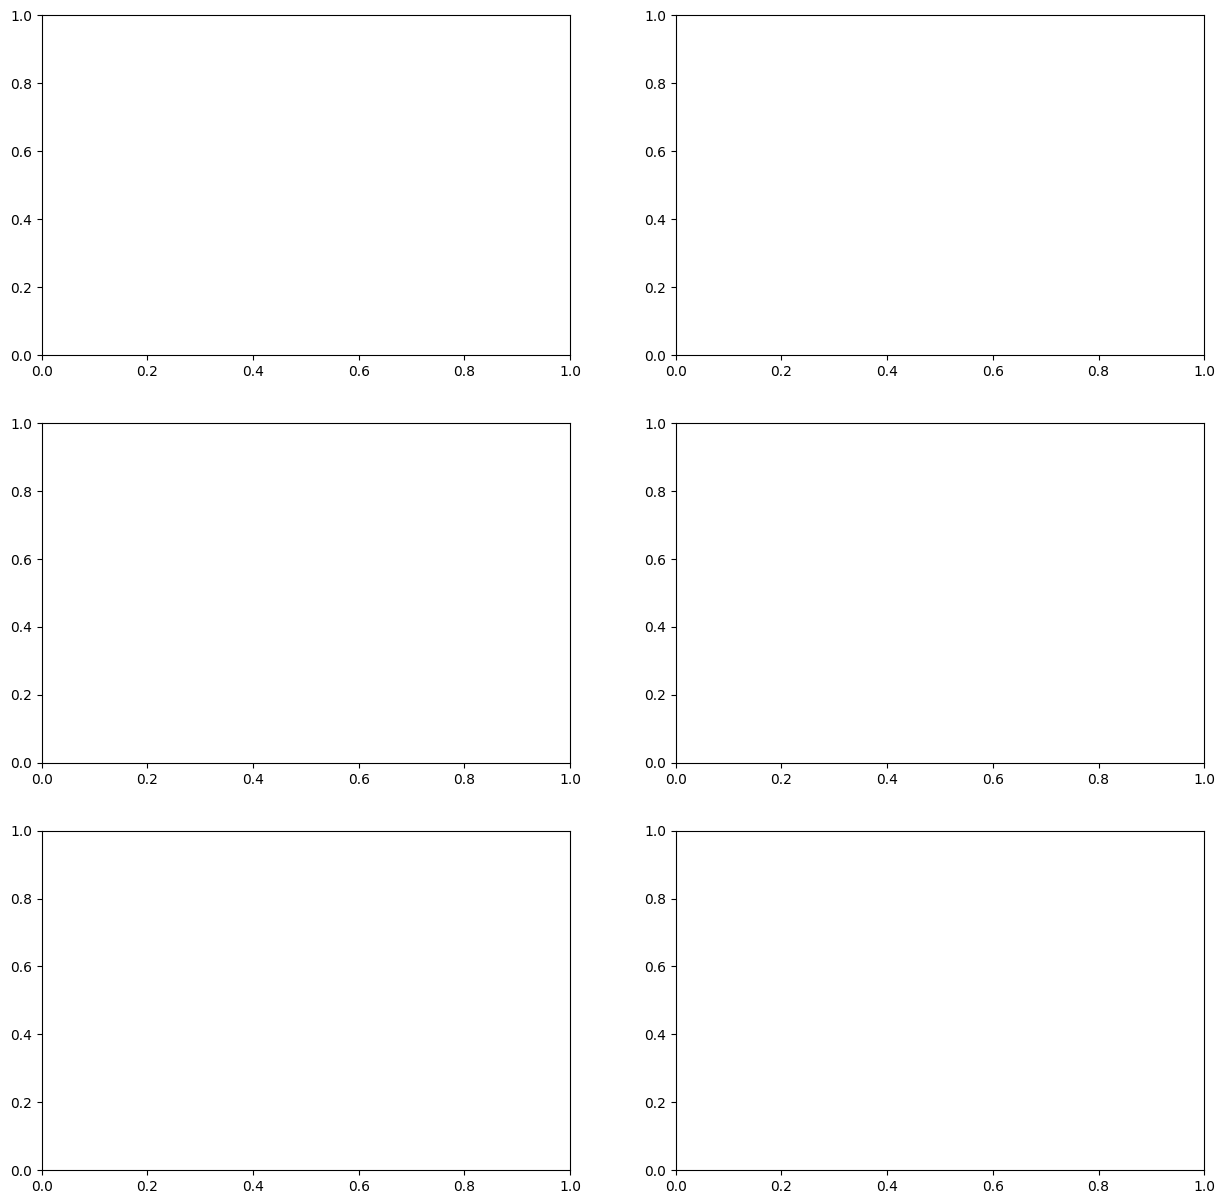

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Set the style

In [11]:
plt.style.use('seaborn-darkgrid')

<ipython-input-11-8bb825865078>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# Plot Total Revenue

In [12]:
plot_trend(axs[0, 0], 'Total Revenue', 'Total Revenue')

# Plot Net Income

In [13]:
plot_trend(axs[0, 1], 'Net Income', 'Net Income')

# Plot Total Assets

In [14]:
plot_trend(axs[1, 0], 'Total Assets', 'Total Assets')

# Plot Total Liabilities

In [15]:
plot_trend(axs[1, 1], 'Total Liabilities', 'Total Liabilities')

# Plot Cash Flow from Operating Activities

In [16]:
plot_trend(axs[2, 0], 'Cash Flow from Operating Activities', 'Cash Flow from Operating Activities')

# Plot Revenue YoY Change

In [17]:
plot_trend(axs[2, 1], 'Revenue YoY Change', 'Revenue YoY Change (%)')

# Adjust layout

In [18]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

# Save and display the figure

In [19]:
fig_path = "Financial_Trends.png"
plt.savefig(fig_path)
plt.show()

<Figure size 640x480 with 0 Axes>

# Display the updated DataFrame with YoY changes

In [20]:
data

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue YoY Change,Net Income YoY Change,Assets YoY Change,Liabilities YoY Change,Cash Flow YoY Change
0,Microsoft,2023,211,72.0,411,198,89,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198,61.0,378,191,81,-6.161137,-15.277778,-8.029197,-3.535354,-8.988764
2,Microsoft,2021,168,56.0,333,176,76,-15.151515,-8.196721,-11.904762,-7.853403,-6.172840
3,Tesla,2023,81,12.0,112,32,16,NaN,NaN,NaN,NaN,NaN
4,Tesla,2022,53,5.0,84,28,11,-34.567901,-58.333333,-25.000000,-12.500000,-31.250000
5,Tesla,2021,32,0.7,52,20,4,-39.622642,-86.000000,-38.095238,-28.571429,-63.636364
6,Apple,2023,394,99.0,351,287,115,NaN,NaN,NaN,NaN,NaN
7,Apple,2022,365,94.0,352,287,104,-7.360406,-5.050505,0.284900,0.000000,-9.565217
8,Apple,2021,274,63.0,351,258,104,-24.931507,-32.978723,-0.284091,-10.104530,0.000000


# Summary of Findings

##Total Revenue
1. **Apple has the highest total revenue among the three companies, showing a significant increase over the years.**

2. **Microsoft also exhibits steady revenue growth.
Tesla's revenue, while lower compared to the other two, has been increasing rapidly.**

##Net Income

1. **Apple consistently has the highest net income, followed by Microsoft.**

2. **Tesla's net income shows considerable growth, turning positive in recent years.**

##Total Assets

**Both Apple and Microsoft have substantial total assets, with slight increases over the years.
Tesla's assets have been growing, albeit at a lower absolute level.**

## Total Liabilities

1. **Apple's liabilities are relatively high but stable.**

2. **Microsoft and Tesla both show increasing liabilities, with Tesla experiencing a more rapid increase.**

## Cash Flow from Operating Activities

1. **Apple has the highest cash flow from operating activities, with some fluctuations.**

2. **Microsoft follows with steady growth in cash flow.
Tesla's cash flow from operating activities shows an increasing trend, reflecting its improving financial health.**

## Year-over-Year (YoY) Changes

1. **Revenue YoY Change indicates fluctuating growth rates, with Tesla showing the most volatility.**

2. **Net Income YoY Change highlights Tesla's significant improvements in recent years.**

3. **Changes in assets, liabilities, and cash flow reveal varying trends among the companies.**

# Conclusion

**The analysis indicates that while Apple and Microsoft show stability and steady growth in their financial metrics, Tesla is experiencing rapid growth and significant improvements in its financial health. These insights can help inform the development of an AI-powered financial chatbot by highlighting key areas of financial performance, growth patterns, and stability across different companies.**

# Further analysis could include:

1. Comparing additional financial metrics.

2. Analyzing quarterly data for more granular insights.

3. Investigating external factors affecting these companies' financial performance.

*By leveraging this information, the AI-powered financial chatbot can provide more accurate and insightful financial advice to users.*